In [1]:
import pandas as pd

In [2]:
t = r'dataset_cur.csv'

In [12]:
df = pd.read_csv(t,index_col=0)
df = df.reset_index(drop=True)
df.head()

,ends,red,yellow,red_diff,remain_ends,last_stone_is_red,page,filepath,INFO,T,red_postion
0,1,0.0,0.0,0.0,8,True,6,./dataset_o\CWC2018-19_Leg1_ResultsBook\geme6e...,True,CWC2018-19_Leg1_ResultsBook,0.0
1,2,2.0,0.0,2.0,7,True,6,./dataset_o\CWC2018-19_Leg1_ResultsBook\geme6e...,True,CWC2018-19_Leg1_ResultsBook,0.0
2,3,1.0,0.0,1.0,6,False,6,./dataset_o\CWC2018-19_Leg1_ResultsBook\geme6e...,True,CWC2018-19_Leg1_ResultsBook,2.0
3,4,0.0,1.0,-1.0,5,False,6,./dataset_o\CWC2018-19_Leg1_ResultsBook\geme6e...,True,CWC2018-19_Leg1_ResultsBook,3.0
4,5,1.0,0.0,1.0,4,True,6,./dataset_o\CWC2018-19_Leg1_ResultsBook\geme6e...,True,CWC2018-19_Leg1_ResultsBook,2.0


In [13]:
df['red_diff'].value_counts()

red_diff
 1.0    4134
-1.0    4021
 2.0    2350
-2.0    2258
 0.0    2008
-3.0     681
 3.0     676
-4.0     202
 4.0     185
 5.0      52
-5.0      43
 6.0       8
-6.0       7
-7.0       1
Name: count, dtype: int64

<Axes: >

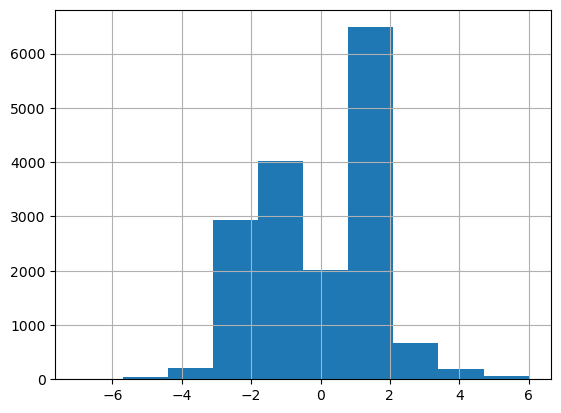

In [14]:
df['red_diff'].hist()

## 3点以上をまとめる

<Axes: >

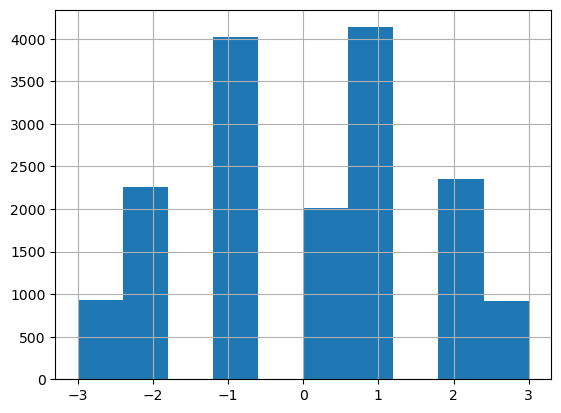

In [19]:
df['pred'] = df['red_diff']
df.loc[df['pred'] >= 3,'pred'] = 3
df.loc[df['pred'] <= -3,'pred'] = -3
df['pred'].hist()

In [20]:
df.pred.value_count()

AttributeError: 'Series' object has no attribute 'value_count'

In [17]:
df.INFO.unique()

array([ True])

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
df.head(2)

,ends,red,yellow,red_diff,remain_ends,last_stone_is_red,page,filepath,INFO,T,red_posiotn
0,1,0.0,0.0,0.0,8,True,6,./dataset_o\CWC2018-19_Leg1_ResultsBook\geme6e...,True,CWC2018-19_Leg1_ResultsBook,0.0
1,2,2.0,0.0,2.0,7,True,6,./dataset_o\CWC2018-19_Leg1_ResultsBook\geme6e...,True,CWC2018-19_Leg1_ResultsBook,0.0


In [18]:
y = df['red_diff']
X = df[['remain_ends','last_stone_is_red','red_posiotn','filepath']]

In [24]:
# 層別サンプリングでデータを分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)

In [36]:
test_df = pd.concat([y_test,X_test] , axis=1)
test_df = test_df.rename(columns={0:'red_diff'})
test_df.to_csv('dataset_cur_test.csv')

In [37]:
test_df = pd.concat([y_train,X_train] , axis=1)
test_df = test_df.rename(columns={0:'red_diff'})
test_df.to_csv('dataset_cur_train.csv')

In [7]:
pd.read_csv('dataset_cur_train.csv')

,Unnamed: 0,red_diff,remain_ends,last_stone_is_red,red_postion,filepath
0,8,1.0,0,True,3.0,./dataset_o\ECC2023_ResultsBook_Women_A-Divisi...
1,0,2.0,8,True,0.0,./dataset_o\ECC2021_ResultsBook_Men_A-Division...
2,8,-2.0,0,False,3.0,./dataset_o\ECC2019_ResultsBook_Women_A-Divisi...
3,7,1.0,1,True,-1.0,./dataset_o\OWG2018_ResultsBook\geme835end8.png
4,8,-3.0,0,False,1.0,./dataset_o\WWCC2018_ResultsBook\geme338end9.png
...,...,...,...,...,...,...
14944,2,-4.0,6,False,0.0,./dataset_o\ECC2022_ResultsBook_Men_A-Division...
14945,6,0.0,2,True,-1.0,./dataset_o\PCCC2022_ResultsBook_Men_A-Divisio...
14946,6,-3.0,2,False,2.0,./dataset_o\WWCC2019_ResultsBook\geme797end7.png
14947,0,1.0,8,True,0.0,./dataset_o\CWC2018-19_Leg3_ResultsBook\geme34...
